## Imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Substituicoes

In [3]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "substituicao", True, "../results/")
rets_final

,Tipo do Ato,Nome do Servidor Substituto,Matrícula do Servidor Substituto,Nome do Servidor a ser Substituido,Matrícula do Servidor a ser SubstituidoCargo,Símbolo do cargo do servidor substituto,Cargo comissionado objeto da substituição,Símbolo do cargo comissionado objeto da substituição,Hierarquia da Lotação,Órgão,Data Inicial da Vigência,Data Final de Vigência,Matrícula SIAPE,Motivo
0,Substituição de Funções,TIAGO SANTANA DE LACERDA para a Funcao de Mem...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Substituição de Funções,CARLOS AUGUSTO DA SILVA JUNIOR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Substituição de Funções,DANIELLE MARTINS VICTOR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Substituição de Funções,LUIS ARMANDO DA SILVA ALMEIDA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Substituição de Funções,as servidoras MARIA FERNANDA CORTES DE OLIVEIRA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305,Substituição de Funções,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
28306,Substituição de Funções,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
28307,Substituição de Funções,ANA LUISA LAMOUNIER COSTA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
28308,Substituição de Funções,CAROLINA DA ROCHA MACHADO TAJRA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Análise

In [4]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

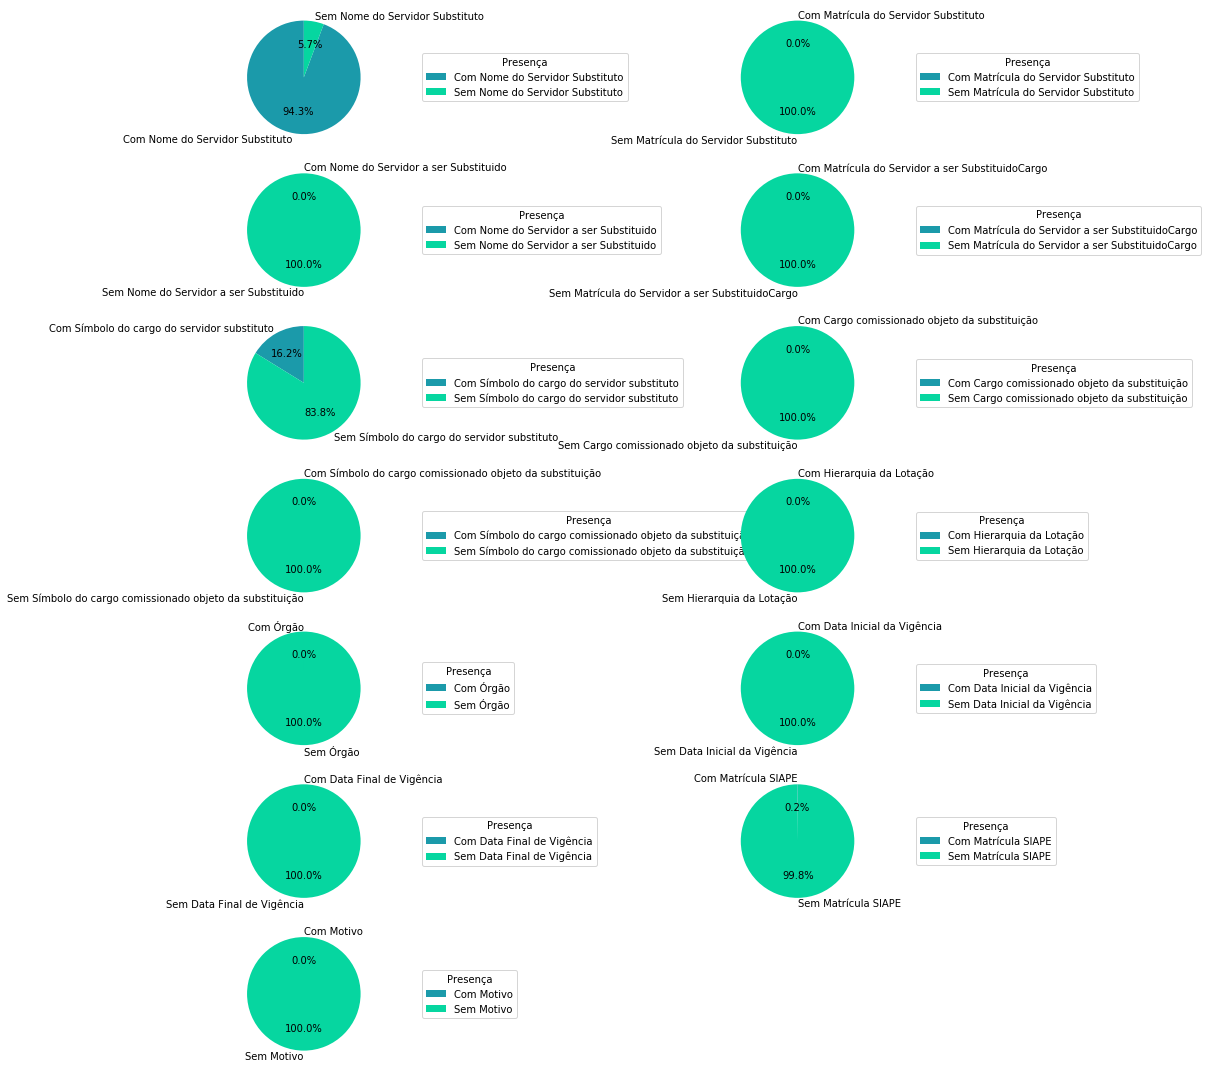

In [5]:

cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)
grid_square = int(grid_square)

_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()